# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

#### Equilibrazione

Simulo una fase liquida, con $T^* = 1.9$, $\rho^* = 0.8$ e $r_c = 2.5$, partendo dalla configurazione iniziale di un cristallo perfetto FCC. Per l'equilibrazione eseguo simulazioni successive, ciascuna composta da 10000 step, misurando ogni 10 per evitare configurazioni troppo correlate. Alla fine di ciascuna salvo la configurazione finale (config.final) e quella immediatamente precedente (old.final), che vengono usate come punto di partenza per la simulazione successiva. In questo modo l'algoritmo anziché generare casualmente le velocità ha la possibilità di calcolarle a partire dalle due configurazioni, per poi scalarle a valori conformi alla temperatura da simulare.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

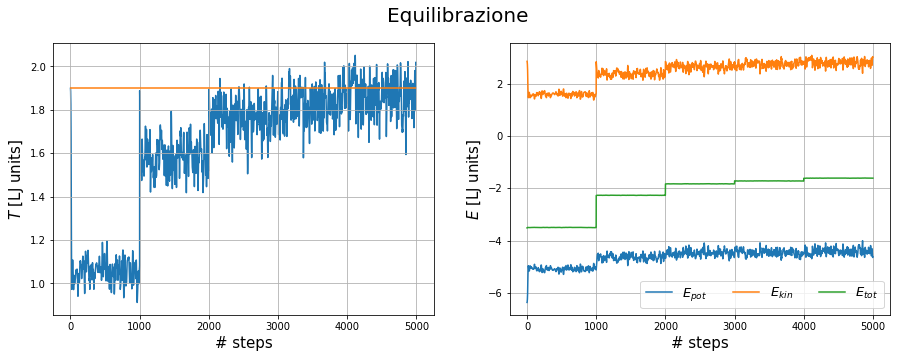

In [2]:
T = np.loadtxt("Es04.1/output_temp.dat", usecols=(0), delimiter=' ', unpack=True)
Epot = np.loadtxt("Es04.1/output_epot.dat", usecols=(0), delimiter=' ', unpack=True)
Ekin = np.loadtxt("Es04.1/output_ekin.dat", usecols=(0), delimiter=' ', unpack=True)
Etot = np.loadtxt("Es04.1/output_etot.dat", usecols=(0), delimiter=' ', unpack=True)

fig = plt.figure(figsize = (15,5))
plt.suptitle('Equilibrazione', size=20)

plt.subplot(1, 2, 1)

plt.plot(T, zorder=1)
plt.hlines(1.9, 0, len(T), color='tab:orange', zorder=2)
plt.xlabel('# steps', size=15)
plt.ylabel('$T$ [LJ units]', size=15)
plt.grid(True)


plt.subplot(1, 2, 2)

plt.plot(Epot, label = '$E_{pot}$')
plt.plot(Ekin, label = '$E_{kin}$')
plt.plot(Etot, label = '$E_{tot}$')
plt.xlabel('# steps', size=15)
plt.ylabel('$E$ [LJ units]', size=15)
plt.grid(True)
plt.legend(loc='lower right',fontsize=13, ncol=3)


plt.show()

Si osserva che dopo qualche ripartenza la temperatura della simulazione oscilla attorno ad un valore costante prossimo a quello desiderato. Nel grafico di destra si osservano l'andamento di energia totale $E_{tot}$, energia potenziale $E_{pot}$ ed energia cinetica $E_{kin}$. Si osserva bene come l'algoritmo conserva l'energia totale, dal momento che le oscillazioni di $E_{tot}$ avvengono su una scala molto più piccola di quella su cui oscillano le altre due grandezze.

La configurazione di partenza è molto più ordinata di quella che si vuole simulare, di conseguenza al primo passo l'energia potenziale aumenta, quindi per la conservazione dell'energia quella cinetica deve diminuire. Facendo ripartire utilizzando le due precedenti configurazioni è possibile stabilizzare la simulazione ad una temperatura simile a quella desiderata.

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

#### Simulazioni Argon

Simulo tre differenti fasi (solida, liquida e gas) dopo averle opportunamente equilibrate.
Calcolo la media a blocchi utilizzando 100000 step, misurando ogni 10 e suddividendo i dati in 100 blocchi. La suddivisione è necessaria perché le configurazioni sono altamente correlate e per poter usare il teorema del limite centrale bisogna scorrelarle. Per tutte le fasi utilizzo come configurazione iniziale un cristallo FCC perfetto.

Il codice utilizza le unità di Lennard-Jones. Per passare a unità del sistema internazionale è necessario tenere conto delle seguente relazioni per la temperatura e l'energia:

$$T = \frac{\epsilon}{k_B} T^*$$

$$ E = \epsilon E^*$$


In [3]:
##### fattori di conversione #####

kB = 1.380649 * 10**-23 #[J K^-1]
T2SI = 120       #energia da unità di LJ a SI [K]
E2SI =  T2SI*kB  #energia da unità di LJ a SI [J]

### Fase solida

Simulo un sistema a $\rho^\star = 1.1$, $T^\star = 0.8$ e $r_c = 2.2$. A partire da un cristallo FCC perfetto e attraverso 6 simulazioni successive, ciascuna da 1000 step, porto il sistema a un equilibrio.

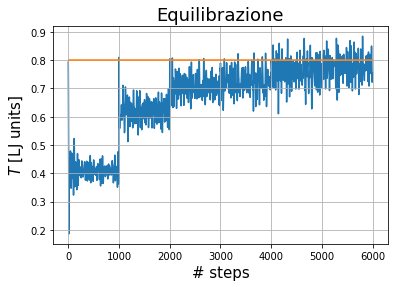

In [4]:
#T = np.loadtxt("Es04.3/Solid/output_temp.dat", usecols=(0), delimiter=None, unpack=True)
T = np.loadtxt("Es04.3/Solid/eq_T.dat", usecols=(0), delimiter=None, unpack=True)
plt.plot(T, zorder=1)
plt.title('Equilibrazione', size=18)
plt.hlines(0.8, 0, len(T), color='tab:orange', zorder=2)
plt.xlabel('# steps', size=15)
plt.ylabel('$T$ [LJ units]', size=15)
plt.grid(True)

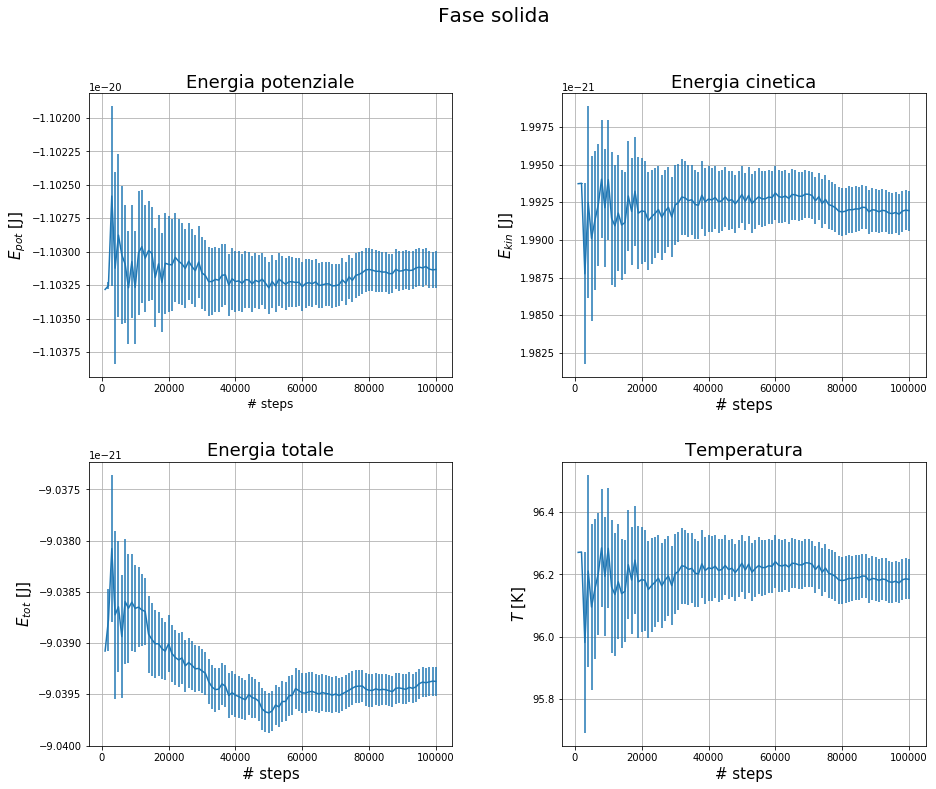

In [5]:
N, sum_prog_epot, err_prog_epot = np.loadtxt("Es04.3/Solid/ave_epot.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_ekin, err_prog_ekin = np.loadtxt("Es04.3/Solid/ave_ekin.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_etot, err_prog_etot = np.loadtxt("Es04.3/Solid/ave_etot.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_temp, err_prog_temp = np.loadtxt("Es04.3/Solid/ave_temp.dat", usecols=(0,1,2), delimiter=None, unpack=True)


fig = plt.figure(figsize = (15,12))
plt.suptitle('Fase solida', size=20)

plt.subplot(2, 2, 1)
plt.errorbar(N, sum_prog_epot*E2SI, yerr=err_prog_epot*E2SI)
plt.xlabel('# steps', size=12)
plt.ylabel('$E_{pot}$ [J]', size=15)
plt.title('Energia potenziale', size=18)
plt.grid(True)


plt.subplot(2, 2, 2)
plt.errorbar(N, sum_prog_ekin*E2SI, yerr=err_prog_ekin*E2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$E_{kin}$ [J]', size=15)
plt.title('Energia cinetica', size=18)
plt.grid(True)


plt.subplot(2, 2, 3)

plt.errorbar(N, sum_prog_etot*E2SI, yerr=err_prog_etot*E2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$E_{tot}$ [J]', size=15)
plt.title('Energia totale', size=18)
plt.grid(True)


plt.subplot(2, 2, 4)

plt.errorbar(N, sum_prog_temp*T2SI, yerr=err_prog_temp*T2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$T$ [K]', size=15)
plt.title('Temperatura', size=18)
plt.grid(True)


plt.subplots_adjust(wspace=0.3, hspace=0.3)

Tutte e quattro le grandezze misurate convergono a un valore dopo un certo numero di passi e l'incertezza si riduce progressivamente. La temperatura in particolare ha un valore simile a quello a cui si è fissata la simulazione.

### Fase liquida

Simulo un sistema a $\rho^\star = 0.8$, $T^\star = 1.1$ e $r_c = 2.5$. A partire da un cristallo FCC perfetto e attraverso 3 simulazioni successive, ciascuna da 1000 step, porto il sistema a un equilibrio. In questo caso il sistema si stabilizza alla temperatura desiderata più velocemente.

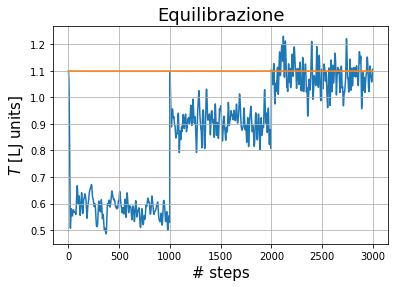

In [6]:
#T = np.loadtxt("Es04.3/Liquid/output_temp.dat", usecols=(0), delimiter=None, unpack=True)
T = np.loadtxt("Es04.3/Liquid/eq_T.dat", usecols=(0), delimiter=None, unpack=True)
plt.plot(T, zorder=1)
plt.title('Equilibrazione', size=18)
plt.hlines(1.1, 0, len(T), color='tab:orange', zorder=2)
plt.xlabel('# steps', size=15)
plt.ylabel('$T$ [LJ units]', size=15)
plt.grid(True)

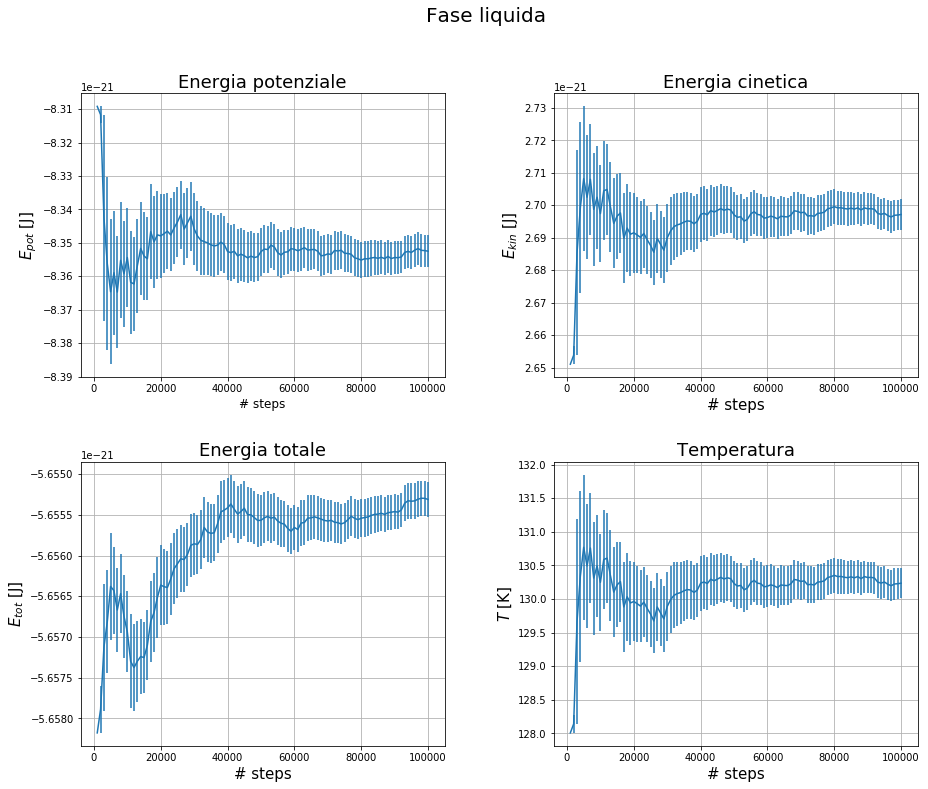

In [7]:
N, sum_prog_epot, err_prog_epot = np.loadtxt("Es04.3/Liquid/ave_epot.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_ekin, err_prog_ekin = np.loadtxt("Es04.3/Liquid/ave_ekin.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_etot, err_prog_etot = np.loadtxt("Es04.3/Liquid/ave_etot.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_temp, err_prog_temp = np.loadtxt("Es04.3/Liquid/ave_temp.dat", usecols=(0,1,2), delimiter=None, unpack=True)



fig = plt.figure(figsize = (15,12))
plt.suptitle('Fase liquida', size=20)

plt.subplot(2, 2, 1)
plt.errorbar(N, sum_prog_epot*E2SI, yerr=err_prog_epot*E2SI)
plt.xlabel('# steps', size=12)
plt.ylabel('$E_{pot}$ [J]', size=15)
plt.title('Energia potenziale', size=18)
plt.grid(True)


plt.subplot(2, 2, 2)
plt.errorbar(N, sum_prog_ekin*E2SI, yerr=err_prog_ekin*E2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$E_{kin}$ [J]', size=15)
plt.title('Energia cinetica', size=18)
plt.grid(True)


plt.subplot(2, 2, 3)

plt.errorbar(N, sum_prog_etot*E2SI, yerr=err_prog_etot*E2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$E_{tot}$ [J]', size=15)
plt.title('Energia totale', size=18)
plt.grid(True)


plt.subplot(2, 2, 4)

plt.errorbar(N, sum_prog_temp*T2SI, yerr=err_prog_temp*T2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$T$ [K]', size=15)
plt.title('Temperatura', size=18)
plt.grid(True)


plt.subplots_adjust(wspace=0.3, hspace=0.3)

Si ha convergenza a dei valori finiti, con una temperatura simile a quella desiderata. Le fluttuazioni si riducono e gli errori diminuiscono al crescere degli step.

### Fase gassosa

Simulo un sistema a $\rho^\star = 0.05$, $T^\star = 1.2$ e $r_c = 5.0$. A partire da un cristallo FCC perfetto e attraverso 5 simulazioni successive, ciascuna da 1000 step, porto il sistema a un equilibrio. In questo caso la temperatura del sistema oscilla molto di più e non si stabilizza mai attorno a un valore costante. Pertanto fermo l'equilibrazione quando la temperatura finale è molto vicina a quella di target.

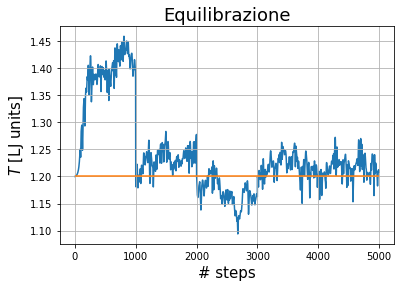

In [8]:
#T = np.loadtxt("Es04.3/Gas/output_temp.dat", usecols=(0), delimiter=None, unpack=True)
T = np.loadtxt("Es04.3/Gas/eq_T.dat", usecols=(0), delimiter=None, unpack=True)
plt.plot(T, zorder=1)
plt.title('Equilibrazione', size=18)
plt.hlines(1.2, 0, len(T), color='tab:orange',zorder=2)
plt.xlabel('# steps', size=15)
plt.ylabel('$T$ [LJ units]', size=15)
plt.grid(True)

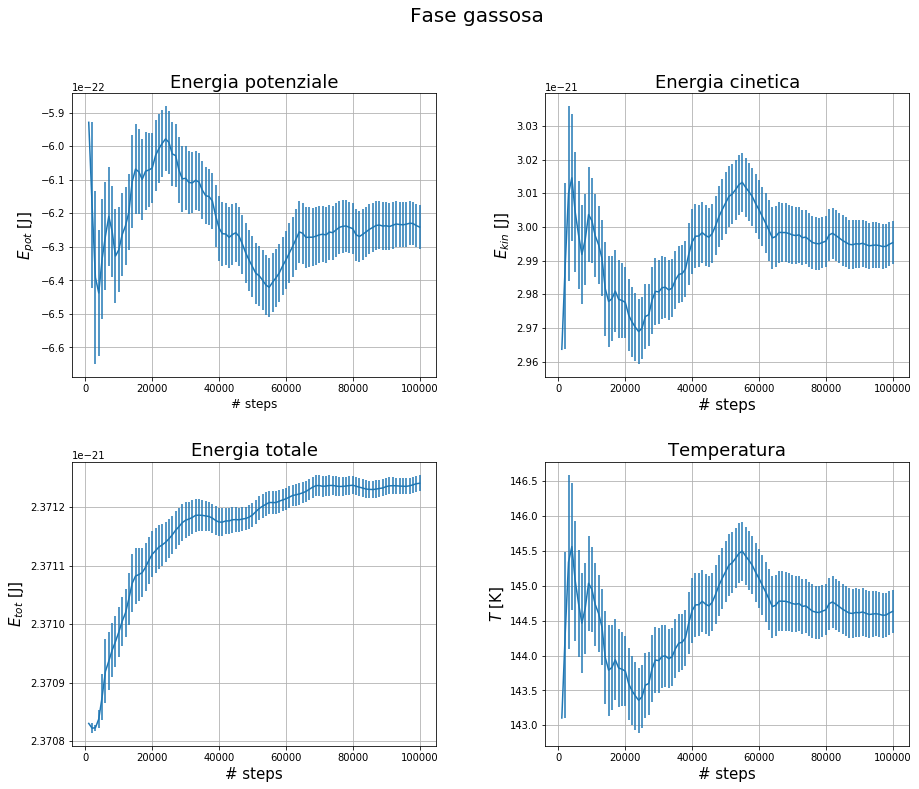

In [9]:
N, sum_prog_epot, err_prog_epot = np.loadtxt("Es04.3/Gas/ave_epot.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_ekin, err_prog_ekin = np.loadtxt("Es04.3/Gas/ave_ekin.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_etot, err_prog_etot = np.loadtxt("Es04.3/Gas/ave_etot.dat", usecols=(0,1,2), delimiter=None, unpack=True)
N, sum_prog_temp, err_prog_temp = np.loadtxt("Es04.3/Gas/ave_temp.dat", usecols=(0,1,2), delimiter=None, unpack=True)


fig = plt.figure(figsize = (15,12))
plt.suptitle('Fase gassosa', size=20)

plt.subplot(2, 2, 1)
plt.errorbar(N, sum_prog_epot*E2SI, yerr=err_prog_epot*E2SI)
plt.xlabel('# steps', size=12)
plt.ylabel('$E_{pot}$ [J]', size=15)
plt.title('Energia potenziale', size=18)
plt.grid(True)


plt.subplot(2, 2, 2)
plt.errorbar(N, sum_prog_ekin*E2SI, yerr=err_prog_ekin*E2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$E_{kin}$ [J]', size=15)
plt.title('Energia cinetica', size=18)
plt.grid(True)


plt.subplot(2, 2, 3)

plt.errorbar(N, sum_prog_etot*E2SI, yerr=err_prog_etot*E2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$E_{tot}$ [J]', size=15)
plt.title('Energia totale', size=18)
plt.grid(True)


plt.subplot(2, 2, 4)

plt.errorbar(N, sum_prog_temp*T2SI, yerr=err_prog_temp*T2SI)
plt.xlabel('# steps', size=15)
plt.ylabel('$T$ [K]', size=15)
plt.title('Temperatura', size=18)
plt.grid(True)



plt.subplots_adjust(wspace=0.3, hspace=0.3)

Dopo un certo numero di blocchi si ha convergenza a dei valori finiti e una temperatura vicina a quella target. Le varie grandezze fluttuano maggiormente rispetto ai casi precedenti.

In tutte e tre le fasi si osserva che l'energia totale varia su scale inferiore rispetto alle due componenti di energia. L'algoritmo conserva bene l'energia totale.

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$